# 1. Installing Dependencies

In [ ]:
!pip install transformers
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 22.1 MB/s 
     |████████████████████████████████| 101 kB 10.4 MB/s 
     |████████████████████████████████| 596 kB 47.7 MB/s 
     |████████████████████████████████| 6.6 MB 64.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 701 kB 18.5 MB/s 
     |████████████████████████████████| 5.9 MB 49.7 MB/s 
     |████████████████████████████████| 419 kB 56.3 MB/s 
     |████████████████████████████████| 141 kB 24.2 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's depe

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# GPU usage
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 92.9 MB/s 
     |████████████████████████████████| 981 kB 60.7 MB/s 
     |████████████████████████████████| 263 kB 65.6 MB/s 
     |████████████████████████████████| 3.8 MB 67.8 MB/s 
     |████████████████████████████████| 1.3 MB 66.6 MB/s 
     |████████████████████████████████| 468 kB 67.0 MB/s 
     |████████████████████████████████| 880 kB 11.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.7-py3-none-any.whl size=25312842 sha256=9649f12f2c0a2a29764e9a53f3490c304afe97880c8e56c3b38dd2c16a2a0879
  Stored in directory: /root/.cache/pip/wheels/e5/98/8e/ce355dcb92451e85fab93f7ea2da068843e93e703928cd06fb
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=21fcbd96c27f6cb59540f0be5016e4f9024f924bb48032994a1596981c5b4b75
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9

In [ ]:
import ktrain
from ktrain import text

# 2. Loading Data

In [ ]:
df = pd.read_csv('/content/customer_service_training.csv')
df.head()

,flags,utterance,category,intent,Column1,Column2
0,BM,I have problems with canceling an order,ORDER,cancel_order,Classify the Intent of the Dialogue.\n\nDialog...,Classify the Category of the Dialogue.\n\nDial...
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order,Classify the Intent of the Dialogue.\n\nDialog...,Classify the Category of the Dialogue.\n\nDial...
2,B,I need help with canceling the last order,ORDER,cancel_order,Classify the Intent of the Dialogue.\n\nDialog...,Classify the Category of the Dialogue.\n\nDial...
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order,Classify the Intent of the Dialogue.\n\nDialog...,Classify the Category of the Dialogue.\n\nDial...
4,B,problem with cancelling an order I made,ORDER,cancel_order,Classify the Intent of the Dialogue.\n\nDialog...,Classify the Category of the Dialogue.\n\nDial...


In [ ]:
df.isnull().sum()

flags        1
utterance    1
category     1
intent       1
Column1      1
Column2      0
dtype: int64

Dropping nan rows

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isnull().sum()

flags        0
utterance    0
category     0
intent       0
Column1      0
Column2      0
dtype: int64

In [ ]:
df['intent'].value_counts()

get_invoice                 324
check_invoice               324
payment_issue               323
review                      315
track_refund                308
set_up_shipping_address     307
place_order                 306
track_order                 305
cancel_order                305
change_order                304
delivery_options            302
check_refund_policy         302
delivery_period             301
contact_customer_service    299
create_account              298
check_cancellation_fee      298
recover_password            298
complaint                   298
delete_account              298
check_payment_methods       297
change_shipping_address     297
contact_human_agent         297
registration_problems       296
newsletter_subscription     295
get_refund                  294
edit_account                294
switch_account              290
Name: intent, dtype: int64

Converting Categorical intent to numerical

In [ ]:
# creating instance of labelencoder
# labelencoder = LabelEncoder()

In [ ]:
# Assigning numerical values and storing in another column
# df['intent_le'] = labelencoder.fit_transform(df['intent'])
# df['intent_le'].describe()

In [ ]:
X = df.utterance
X.head()

0              I have problems with canceling an order
1    how can I find information about canceling ord...
2            I need help with canceling the last order
3    could you help me cancelling the last order I ...
4              problem with cancelling an order I made
Name: utterance, dtype: object

In [ ]:
# y = df.intent_le
y = df.intent
y.head()

0    cancel_order
1    cancel_order
2    cancel_order
3    cancel_order
4    cancel_order
Name: intent, dtype: object

In [ ]:
y.value_counts()

get_invoice                 324
check_invoice               324
payment_issue               323
review                      315
track_refund                308
set_up_shipping_address     307
place_order                 306
track_order                 305
cancel_order                305
change_order                304
delivery_options            302
check_refund_policy         302
delivery_period             301
contact_customer_service    299
create_account              298
check_cancellation_fee      298
recover_password            298
complaint                   298
delete_account              298
check_payment_methods       297
change_shipping_address     297
contact_human_agent         297
registration_problems       296
newsletter_subscription     295
get_refund                  294
edit_account                294
switch_account              290
Name: intent, dtype: int64

Hence there are 27 classes

`get_invoice`, `check_invoice`, `payment_issue`, `review`, `track_refund`, `set_up_shipping_address`, `place_order`, `track_order`, `cancel_order`, `change_order`, `delivery_options`, 
`check_refund_policy`, `delivery_period`, `contact_customer_service`, 
`create_account`, `check_cancellation_fee`, `recover_password`, 
`complaint`, `delete_account`, `check_payment_methods`, 
`change_shipping_address`, `contact_human_agent`, `registration_problems`, `newsletter_subscription`, `get_refund`, `edit_account`, `switch_account`.

Train Val Test Splitting

train, val, test split : 80:10:10

In [ ]:
# train test split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# val test split
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.50, random_state=0)

In [ ]:
# df[['intent', 'intent_le']]

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((6540,), (817,), (818,))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((6540,), (817,), (818,))

In [ ]:
y_val.head()

4482                edit_account
8079                track_refund
880      change_shipping_address
2602    contact_customer_service
4474                edit_account
Name: intent, dtype: object

# 3. Building simplet5 model

prefix: `multilabel classification`

In [ ]:
!pip install --upgrade simplet5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 17.0 MB/s 
     |████████████████████████████████| 527 kB 44.5 MB/s 
     |████████████████████████████████| 952 kB 42.0 MB/s 
     |████████████████████████████████| 829 kB 30.6 MB/s 
  Created wheel for simplet5: filename=simplet5-0.1.4-py3-none-any.whl size=6873 sha256=639c5b0ecb2300e5a85be4a4dd89e50ecbac72f975716c2a0ea14973daa051c1
  Stored in directory: /root/.cache/pip/wheels/30/1b/96/47ad5fda68def6635961fd0ca312fc0ce3670936ae09d97c43
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=acbf556adf0bd362ddaa309e9c632fc10d7caea49c892b12e526eaac462dca99
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built simplet5 future
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-5

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("t5-base")

model = AutoModelWithLMHead.from_pretrained("t5-base")

[autoreload of pkg_resources failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: yield_lines() requires a code object with 0 free vars, not 2
]
[autoreload of transformers failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
RecursionError: maximum recursion depth exceeded
]
[autoreload of transformers.file_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
RecursionError: maximum recursion depth exceeded while calling a Python object
]
[autoreload of transformers.models.albert failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-package

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Create Train df and Val df

In [ ]:
tr_d = {'source_text': X_train, 'target_text': y_train}
va_d = {'source_text': X_val, 'target_text': y_val}
te_d = {'source_text': X_test, 'target_text': y_test}

In [ ]:
train_df = pd.DataFrame(tr_d)  
eval_df = pd.DataFrame(va_d)  
test_df = pd.DataFrame(te_d)    

In [ ]:
train_df['source_text'] = "multilabel classification: " + train_df['source_text']
eval_df['source_text'] = "multilabel classification: " + eval_df['source_text']
test_df['source_text'] = "multilabel classification: " + test_df['source_text']

In [ ]:
train_df.head()

,source_text,target_text
6676,multilabel classification: how can I submit so...,review
4923,multilabel classification: I don't know how I ...,get_refund
1086,multilabel classification: how to check the wi...,check_cancellation_fee
3909,multilabel classification: how could I check w...,delivery_options
7240,multilabel classification: I cannot set anothe...,set_up_shipping_address


In [ ]:
from simplet5 import SimpleT5

# instantiate
model = SimpleT5()

# load (supports t5, mt5, byT5 models)
model.from_pretrained("t5","t5-base")

# train
model.train(
    train_df=train_df, # pandas dataframe with 2 columns: source_text & target_text
    eval_df=eval_df, # pandas dataframe with 2 columns: source_text & target_text
    source_max_token_len = 512, 
    target_max_token_len = 128,
    batch_size = 8,
    max_epochs = 5,
    use_gpu = True,
    outputdir = "outputs",
    early_stopping_patience_epochs = 0,
    precision = 32
)

INFO:pytorch_lightning.utilities.seed:Global seed set to 42
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.distributed:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
!( cd outputs; ls )

simplet5-epoch-0-train-loss-0.1706-val-loss-0.0015
simplet5-epoch-1-train-loss-0.0056-val-loss-0.0004
simplet5-epoch-2-train-loss-0.0028-val-loss-0.0007


In [ ]:
# load trained T5 model
model.load_model("t5","outputs/simplet5-epoch-2-train-loss-0.0028-val-loss-0.0007", use_gpu=True)

## Predictions on Test Data

In [ ]:
X_test.head()

4904         I don't know what to do to get my money back
321                      I need help to add several items
1788    i need help checking what payment methods are ...
291     I am trying to find information about cancelin...
5064          could you help me to get a refund of money?
Name: utterance, dtype: object

In [ ]:
text = "I don't know what to do to get my money back"
model.predict(text)

['get_refund']

In [ ]:
text = "I need help to add several items"
model.predict(text)

['change_order']

In [ ]:
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 818 	accurately-predicted-data: 0 	 wrongly-predicted-data:  818
Accuracy: 0.0 %


## Predictions on New Data

In [ ]:
# predict
text="""I have some consumer complaint issues
"""

['complaint']

In [ ]:
text = "i dont know how to use the website to add some items to the cart"

In [ ]:
model.predict(text)

['change_order']

# 4. Building distilbert-base-uncased Model: 
`distilbert-base-uncased`: https://huggingface.co/transformers/v3.3.1/pretrained_models.html

In [ ]:
categories = [
    'get_invoice', 'check_invoice', 'payment_issue', 'review', 'track_refund', 'set_up_shipping_address', 
    'place_order', 'track_order', 'cancel_order', 'change_order', 'delivery_options', 'check_refund_policy', 
    'delivery_period', 'contact_customer_service', 'create_account', 'check_cancellation_fee', 'recover_password', 
    'complaint', 'delete_account', 'check_payment_methods', 'change_shipping_address', 'contact_human_agent', 
    'registration_problems', 'newsletter_subscription', 'get_refund', 'edit_account', 'switch_account'
]

In [ ]:
# base = base version
# uncased = case insensitive
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen = 512, class_names = categories)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_data = trans.preprocess_train(X_train.to_numpy(), y_train.to_numpy())
val_data = trans.preprocess_test(X_val.to_numpy(), y_val.to_numpy())

preprocessing train...
language: en
train sequence lengths:
	mean : 8
	95percentile : 12
	99percentile : 14


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 8
	95percentile : 12
	99percentile : 13


In [ ]:
model = trans.get_classifier()

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = val_data, batch_size = 16)

Finding the best learning rate

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
408/408 [==============================] - 371s 878ms/step - loss: 3.2971 - accuracy: 0.0366
Epoch 2/10
408/408 [==============================] - 361s 886ms/step - loss: 3.1288 - accuracy: 0.2662
Epoch 3/10
408/408 [==============================] - 361s 886ms/step - loss: 1.3381 - accuracy: 0.9226
Epoch 4/10
408/408 [==============================] - 360s 883ms/step - loss: 0.1097 - accuracy: 0.9911
Epoch 5/10
408/408 [==============================] - 129s 314ms/step - loss: 0.6294 - accuracy: 0.8480


done.
Visually inspect loss plot and select learning rate associated with falling loss


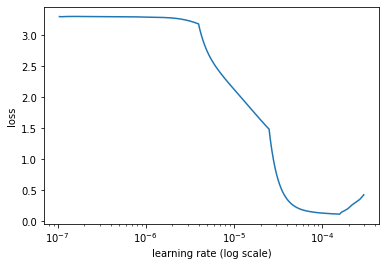

In [ ]:
# this may take a long time
# 30 mins
# LR Plot
learner.lr_find(show_plot=True, max_epochs = 10)

Based on Visual Inspection Best Learning Rate = `1e-4`

In [ ]:
lr = 1e-4
epochs = 1
learner.fit_onecycle(lr, epochs)



begin training using onecycle policy with max lr of 0.0001...
409/409 [==============================] - 370s 877ms/step - loss: 0.8574 - accuracy: 0.8483 - val_loss: 0.0240 - val_accuracy: 0.9985


Validation Accuracy: `99.8%`

In [ ]:
learner

In [ ]:
# confusion matrix
learner.validate(class_names = categories)

                          precision    recall  f1-score   support

             get_invoice       1.00      1.00      1.00        60
           check_invoice       1.00      1.00      1.00        37
           payment_issue       1.00      1.00      1.00        45
                  review       1.00      1.00      1.00        42
            track_refund       1.00      1.00      1.00        48
 set_up_shipping_address       1.00      1.00      1.00        45
             place_order       1.00      1.00      1.00        49
             track_order       1.00      1.00      1.00        47
            cancel_order       1.00      1.00      1.00        57
            change_order       1.00      1.00      1.00        62
        delivery_options       0.98      1.00      0.99        46
     check_refund_policy       1.00      1.00      1.00        51
         delivery_period       1.00      1.00      1.00        49
contact_customer_service       1.00      1.00      1.00        41
         

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],


In [ ]:
# find data which is not performing good
pts = 5
learner.view_top_losses(n = pts, preproc = trans)

----------
id:25 | loss:3.24 | true:newsletter_subscription | pred:contact_human_agent)

----------
id:971 | loss:2.24 | true:contact_human_agent | pred:delivery_options)



## Prediction on Test data

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc = trans)

In [ ]:
y_test_pred = predictor.predict(X_test.to_numpy())
y_test_pred

['recover_password',
 'check_invoice',
 'set_up_shipping_address',
 'get_invoice',
 'recover_password',
 'contact_customer_service',
 'payment_issue',
 'create_account',
 'cancel_order',
 'payment_issue',
 'edit_account',
 'track_order',
 'place_order',
 'newsletter_subscription',
 'registration_problems',
 'newsletter_subscription',
 'complaint',
 'complaint',
 'get_invoice',
 'check_payment_methods',
 'contact_customer_service',
 'edit_account',
 'edit_account',
 'set_up_shipping_address',
 'contact_customer_service',
 'check_refund_policy',
 'check_refund_policy',
 'get_invoice',
 'check_payment_methods',
 'recover_password',
 'check_refund_policy',
 'change_order',
 'delete_account',
 'track_order',
 'payment_issue',
 'contact_customer_service',
 'cancel_order',
 'place_order',
 'set_up_shipping_address',
 'get_refund',
 'get_refund',
 'track_order',
 'delivery_period',
 'get_invoice',
 'cancel_order',
 'complaint',
 'check_invoice',
 'edit_account',
 'create_account',
 'cancel_ord

In [ ]:
accuracy_score(y_test, y_test_pred)

0.0

## Prediction on New Data

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc = trans)

In [ ]:
x = 'user error'

In [ ]:
predictor.predict(x)

'contact_human_agent'